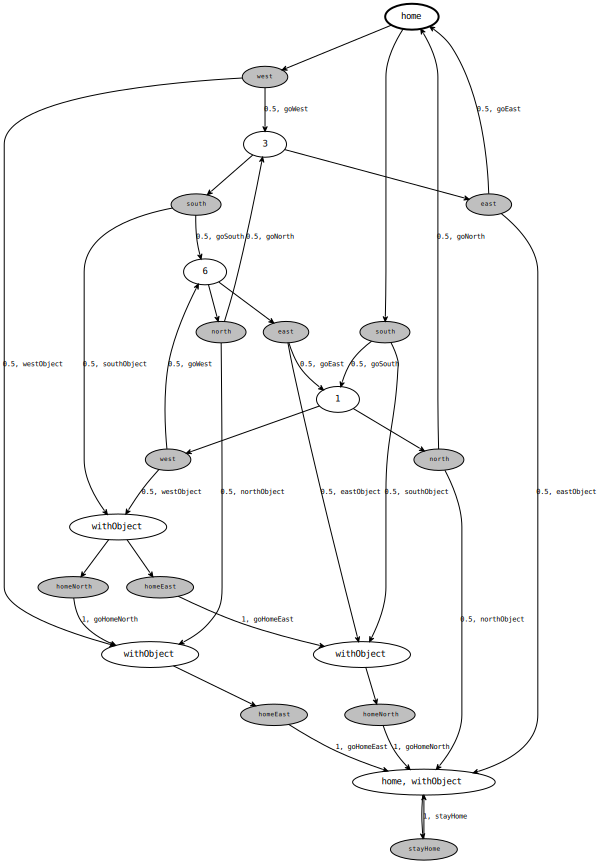

In [15]:
%states

# Constant probability, any size of map, any number of objects

float p = 0.5;

ctrl North = 0;
ctrl East = 0;
ctrl West = 0;
ctrl South = 0;
ctrl Unit = 0;
ctrl Inventory = 0;
ctrl Object = 0;

big home = North.Unit.1 || East.Unit.1 || West.1 || South.1;
big initial = home || Inventory.1;
big withObject = Inventory.Object;

action west
    react goWest = East.Unit || West -[1.0-p]-> East || West.Unit;
    react westObject = East.Unit || West || Inventory -[p]-> East || West.Unit || Inventory.Object;
end
action east
    react goEast = West.Unit || East -[1.0-p]-> West || East.Unit;
    react eastObject = West.Unit || East || Inventory -[p]-> West || East.Unit || Inventory.Object;
end
action north
    react goNorth = South.Unit || North -[1.0-p]-> South || North.Unit;
    react northObject = South.Unit || North || Inventory -[p]-> South || North.Unit || Inventory.Object;
end
action south
    react goSouth = North.Unit || South -[1.0-p]-> North || South.Unit;
    react southObject = North.Unit || South || Inventory -[p]-> North || South.Unit || Inventory.Object;
end

action homeNorth
    react goHomeNorth = withObject || South.Unit || North -[1.0]-> withObject || South || North.Unit;
end
action homeEast
    react goHomeEast = withObject || West.Unit || East -[1.0]-> withObject || West || East.Unit;
end
action stayHome
    react stayHome = withObject || home -[1.0]-> withObject || home;
end

begin nbrs
    init initial;
    rules = [ {stayHome, goHomeNorth, goHomeEast},
    {goNorth, goEast, goWest, goSouth, northObject, eastObject, westObject, southObject} ];
    preds = { home, withObject };
end

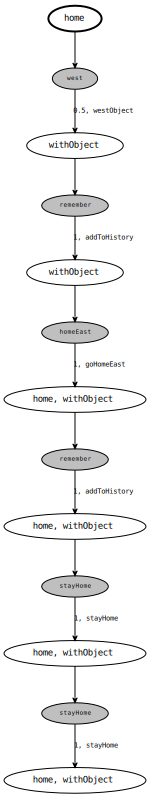

In [2]:
%simulate 5

# Explored vs unexplored: sets?
# No way to check if the current location is in the set

float p = 0.5;

ctrl CurrentLocation = 0;
ctrl Location = 0;
ctrl North = 0;
ctrl East = 0;
ctrl West = 0;
ctrl South = 0;
ctrl Unit = 0;
ctrl Explored = 0;

ctrl Inventory = 0;
ctrl Object = 0;

ctrl State = 0;
ctrl Move = 0;
ctrl Remember = 0;

big homeLocation = Location.(North.Unit.1 | East.Unit.1 | West.1 | South.1);
big home = CurrentLocation.homeLocation;
big initial = home || Inventory.1 || Explored.homeLocation || State.Move.1;
big withObject = Inventory.Object;

action remember
    react addToHistory = State.Remember.1 || CurrentLocation.id || Explored.id -[1.0]->
        State.Move.1 || CurrentLocation.id || Explored.(id | id) @ [0, 1, 0];
end

action west
    react goWest = State.Move || CurrentLocation.Location.(East.Unit | West | id) -[1.0-p]->
        State.Remember || CurrentLocation.Location.(East | West.Unit | id);
    react westObject = State.Move || CurrentLocation.Location.(East.Unit | West | id) || Inventory -[p]->
        State.Remember || CurrentLocation.Location.(East | West.Unit | id) || Inventory.Object;
end
action east
    react goEast = State.Move || CurrentLocation.Location.(West.Unit | East | id) -[1.0-p]->
        State.Remember || CurrentLocation.Location.(West | East.Unit | id);
    react eastObject = State.Move || CurrentLocation.Location.(West.Unit | East | id) || Inventory -[p]->
        State.Remember || CurrentLocation.Location.(West | East.Unit | id) || Inventory.Object;
end
#action north
#react goNorth = South.Unit || North -[1.0-p]-> South || North.Unit;
#react northObject = South.Unit || North || Inventory -[p]-> South || North.Unit || Inventory.Object;
#end
#action south
#react goSouth = North.Unit || South -[1.0-p]-> North || South.Unit;
#react southObject = North.Unit || South || Inventory -[p]-> North || South.Unit || Inventory.Object;
#end

#action homeNorth
#react goHomeNorth = withObject || South.Unit || North -[1.0]-> withObject || South || North.Unit;
#end
action homeEast
    react goHomeEast = withObject || State.Move || CurrentLocation.Location.(West.Unit | East | id) -[1.0]->
        withObject || State.Remember || CurrentLocation.Location.(West | East.Unit | id);
end
action stayHome
    react stayHome = withObject || home -[1.0]-> withObject || home;
end

begin nbrs
    init initial;
    rules = [{addToHistory}, {stayHome, goHomeEast},
    {goEast, goWest, eastObject, westObject} ];
    #rules = [ {stayHome, goHomeNorth, goHomeEast},
    #{goNorth, goEast, goWest, goSouth, northObject, eastObject, westObject, southObject} ];
    preds = { home, withObject };
end

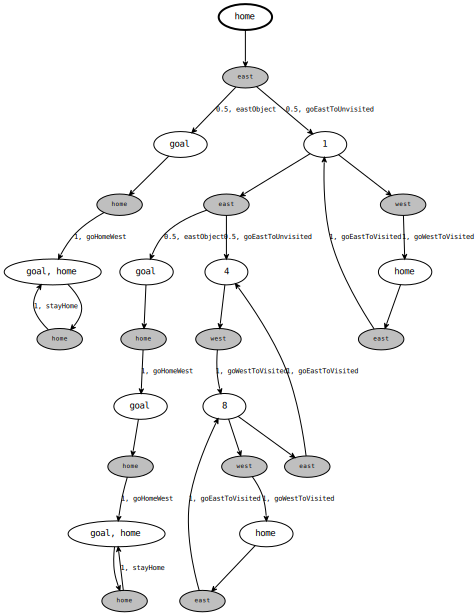

In [2]:
%states

# Visited states are tracked
# Grid cell = node with 4 directions
# No fixed number of objects
# Assumption: starting at the west-most cell

float p = 0.5;

ctrl Cell = 3;
ctrl Agent = 0;
ctrl Inventory = 0;
ctrl Object = 0;
atomic ctrl WestVoid = 1;
atomic ctrl EastVoid = 1;
atomic ctrl West = 1;
atomic ctrl East = 1;
atomic ctrl Visited = 1;
atomic ctrl Unvisited = 1;

big initial = Inventory.1
            || WestVoid{west}
            || EastVoid{east}
            || Visited{v}
            || Unvisited{u}
            || Cell{west, r, v}.Agent.(West{west} | East{r})
            || Cell{r, p, u}.1
            || Cell{p, east, u}.1;
big goal = Inventory.Object;
big home = WestVoid{west} || Cell{west, y, v}.Agent;

action west
    react goWestToVisited = Visited{v}
                            || Cell{x, l, v}
                            || Cell{l, r, v}.Agent.(West{l} | East{r})
                            -[1.0]->
                            Visited{v}
                            || Cell{x, l, v}.Agent.(West{x} | East{l})
                            || Cell{l, r, v};
    react goWestToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{x, l, u} 
                            || Cell{l, r, v}.Agent.(West{l} | East{r})
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{x, l, v}.Agent.(West{x} | East{l})
                            || Cell{l, r, v};
    react westObject = Inventory
                    || Visited{v}
                    || Unvisited{u}
                    || Cell{x, l, u}
                    || Cell{l, r, v}.Agent.(West{l} | East{r})
                    -[p]->
                    Inventory.Object
                    || Visited{v}
                    || Unvisited{u}
                    || Cell{x, l, v}.Agent.(West{x} | East{l})
                    || Cell{l, r, v};
end

action east
    react goEastToVisited = Visited{v}
                        || Cell{l, r, v}.Agent.(West{l} | East{r})
                        || Cell{r, x, v}
                        -[1.0]->
                        Visited{v}
                        || Cell{l, r, v}
                        || Cell{r, x, v}.Agent.(West{r} | East{x});
    react goEastToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{l, r, v}.Agent.(West{l} | East{r})
                            || Cell{r, x, u}
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{l, r, v}
                            || Cell{r, x, v}.Agent.(West{r} | East{x});
    react eastObject = Inventory
                    || Visited{v}
                    || Unvisited{u}
                    || Cell{l, r, v}.Agent.(West{l} | East{r})
                    || Cell{r, x, u}
                    -[p]->
                    Inventory.Object
                    || Visited{v}
                    || Unvisited{u}
                    || Cell{l, r, v}
                    || Cell{r, x, v}.Agent.(West{r} | East{x});
end

action home
    react goHomeWest = goal
                    || Visited{v}
                    || Cell{x, l, v}
                    || Cell{l, r, v}.Agent.(West{l} | East{r})
                    -[1.0]->
                    goal
                    || Visited{v}
                    || Cell{x, l, v}.Agent.(West{x} | East{l})
                    || Cell{l, r, v};
    react stayHome = goal
                    || WestVoid{w}
                    || Cell{w, y, v}.Agent
                    -[1.0]->
                    goal
                    || WestVoid{w}
                    || Cell{w, y, v}.Agent;
end

begin nbrs
    init initial;
    rules = [ {goHomeWest, stayHome},
        {goWestToUnvisited, goWestToVisited, goEastToUnvisited, goEastToVisited, westObject, eastObject} ];
    preds = { goal, home };
end

home

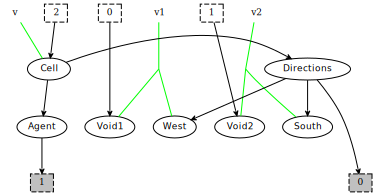

initial

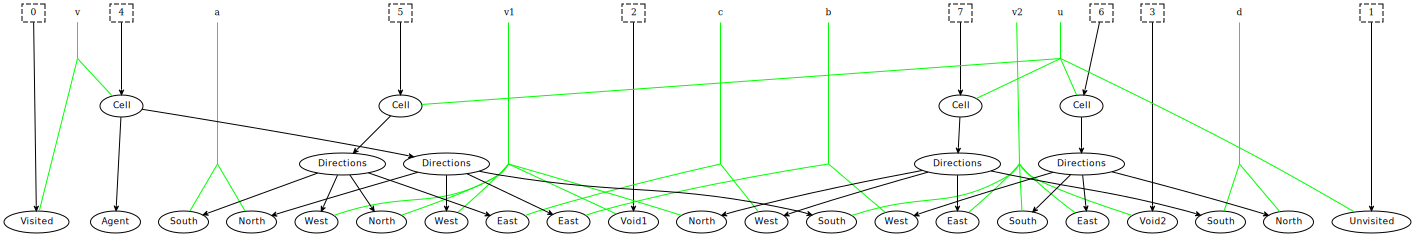

goal

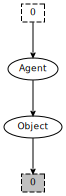

goWestToVisited

,→,


goWestToUnvisited

,→,


westObject

,→,


goEastToVisited

,→,


goEastToUnvisited

,→,


eastObject

,→,


goNorthToVisited

,→,


goNorthToUnvisited

,→,


northObject

,→,


goSouthToVisited

,→,


goSouthToUnvisited

,→,


southObject

,→,


goHomeWestVisited

,→,


goHomeWestUnvisited

,→,


goHomeSouthVisited

,→,


goHomeSouthUnvisited

,→,


stayHome

,→,


In [5]:

# Same, but with 2D

float p = 0.5;

ctrl Cell = 1; # visited/unvisited
ctrl Agent = 0;
ctrl Directions = 0;
ctrl Object = 0;

# Different voids for left/right and up/down so that the opposite edges of the map are not connected
atomic ctrl Void1 = 1;
atomic ctrl Void2 = 1;

atomic ctrl North = 1;
atomic ctrl East = 1;
atomic ctrl West = 1;
atomic ctrl South = 1;

atomic ctrl Visited = 1;
atomic ctrl Unvisited = 1;

big home = Void1{v1} || Void2{v2} || Cell{v}.(Directions.(West{v1} | South{v2} | id) | Agent);
big initial = Visited{v}
            || Unvisited{u}
            || Void1{v1}
            || Void2{v2}
            || Cell{v}.(Directions.(North{a} | East{b} | West{v1} | South{v2}) | Agent.1) # bottom left
            || Cell{u}.Directions.(North{v1} | East{c} | West{v1} | South{a})             # top left
            || Cell{u}.Directions.(North{d} | East{v2} | West{b} | South{v2})             # bottom right
            || Cell{u}.Directions.(North{v1} | East{v2} | West{c} | South{d});            # top right
big goal = Agent.Object;

action west
    react goWestToVisited = Visited{v}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react goWestToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react westObject = Visited{v}
                    || Unvisited{u}
                    || Cell{u}.Directions.(East{b} | id)
                    || Cell{v}.(Directions.(West{b} | id) | Agent)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(East{b} | id) | Agent.Object)
                    || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
end

action east
    react goEastToVisited = Visited{v}
                        || Cell{v}.(Directions.(East{b} | id) | Agent)
                        || Cell{v}.Directions.(West{b} | id)
                        -[1.0]->
                        Visited{v}
                        || Cell{v}.Directions.(East{b} | id)
                        || Cell{v}.(Directions.(West{b} | id) | Agent) @ [0, 2, 1];
    react goEastToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{u}.Directions.(West{b} | id)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent) @ [0, 2, 1];
    react eastObject = Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(East{b} | id) | Agent)
                    || Cell{u}.Directions.(West{b} | id)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.Directions.(East{b} | id)
                    || Cell{v}.(Directions.(West{b} | id) | Agent.Object) @ [0, 2, 1];
end

action north
    react goNorthToVisited = Visited{v}
                        || Cell{v}.(Directions.(North{b} | id) | Agent)
                        || Cell{v}.Directions.(South{b} | id)
                        -[1.0]->
                        Visited{v}
                        || Cell{v}.Directions.(North{b} | id)
                        || Cell{v}.(Directions.(South{b} | id) | Agent) @ [0, 2, 1];
    react goNorthToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(North{b} | id) | Agent)
                            || Cell{u}.Directions.(South{b} | id)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.Directions.(North{b} | id)
                            || Cell{v}.(Directions.(South{b} | id) | Agent) @ [0, 2, 1];
    react northObject = Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(North{b} | id) | Agent)
                    || Cell{u}.Directions.(South{b} | id)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.Directions.(North{b} | id)
                    || Cell{v}.(Directions.(South{b} | id) | Agent.Object) @ [0, 2, 1];
end

action south
    react goSouthToVisited = Visited{v}
                        || Cell{v}.(Directions.(South{b} | id) | Agent)
                        || Cell{v}.Directions.(North{b} | id)
                        -[1.0]->
                        Visited{v}
                        || Cell{v}.Directions.(South{b} | id)
                        || Cell{v}.(Directions.(North{b} | id) | Agent) @ [0, 2, 1];
    react goSouthToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(South{b} | id) | Agent)
                            || Cell{u}.Directions.(North{b} | id)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.Directions.(South{b} | id)
                            || Cell{v}.(Directions.(North{b} | id) | Agent) @ [0, 2, 1];
    react southObject = Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(South{b} | id) | Agent)
                    || Cell{u}.Directions.(North{b} | id)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.Directions.(South{b} | id)
                    || Cell{v}.(Directions.(North{b} | id) | Agent.Object) @ [0, 2, 1];
end

action home
    react goHomeWestVisited = Visited{v}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(East{b} | id) | goal)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react goHomeWestUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | goal)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react goHomeSouthVisited = Visited{v}
                            || Cell{v}.Directions.(North{b} | id)
                            || Cell{v}.(Directions.(South{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(North{b} | id) | goal)
                            || Cell{v}.Directions.(South{b} | id) @ [0, 2, 1];
    react goHomeSouthUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(North{b} | id)
                            || Cell{v}.(Directions.(South{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(North{b} | id) | goal)
                            || Cell{v}.Directions.(South{b} | id) @ [0, 2, 1];
    react stayHome = Void1{v1}
                    || Void2{v2}
                    || Cell{v}.(Directions.(West{v1} | South{v2} | id) | goal)
                    -[1.0]->
                    Void1{v1}
                    || Void2{v2}
                    || Cell{v}.(Directions.(West{v1} | South{v2} | id) | goal);
end

begin nbrs
    init initial;
    rules = [ {goHomeWestVisited, goHomeWestUnvisited, goHomeSouthVisited, goHomeSouthUnvisited, stayHome},
        {goWestToUnvisited, goWestToVisited, goEastToUnvisited, goEastToVisited,
        goNorthToUnvisited, goNorthToVisited, goSouthToUnvisited, goSouthToVisited,
        westObject, eastObject, northObject, southObject} ];
    preds = { goal, home };
end

home

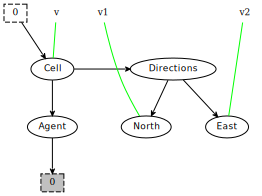

goal

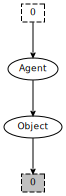

initial

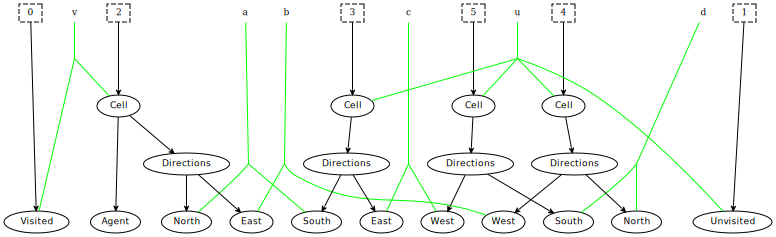

goWestToVisited

,→,


goWestToUnvisited

,→,


westObject

,→,


goEastToVisited

,→,


goEastToUnvisited

,→,


eastObject

,→,


goNorthToVisited

,→,


goNorthToUnvisited

,→,


northObject

,→,


goSouthToVisited

,→,


goSouthToUnvisited

,→,


southObject

,→,


goHomeWestVisited

,→,


goHomeWestUnvisited

,→,


goHomeSouthVisited

,→,


goHomeSouthUnvisited

,→,


stayHome

,→,


In [3]:

# Avoiding voids :)

float p = 0.5;

ctrl Cell = 1;
ctrl Agent = 0;
ctrl Directions = 0;
ctrl Object = 0;

atomic ctrl North = 1;
atomic ctrl East = 1;
atomic ctrl West = 1;
atomic ctrl South = 1;

atomic ctrl Visited = 1;
atomic ctrl Unvisited = 1;

big home = Cell{v}.(Directions.(North{v1}
                              | East{v2})
                  | Agent);
big goal = Agent.Object;
big initial = Visited{v}
           || Unvisited{u}
           # bottom left
           || Cell{v}.(Directions.(North{a}
                                 | East{b})
                     | Agent.1)
           # top left
           || Cell{u}.Directions.(East{c}
                                | South{a})
           # bottom right
           || Cell{u}.Directions.(North{d}
                                | West{b})
           # top right
           || Cell{u}.Directions.(West{c}
                                | South{d});

action west
    react goWestToVisited = Visited{v}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react goWestToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react westObject = Visited{v}
                    || Unvisited{u}
                    || Cell{u}.Directions.(East{b} | id)
                    || Cell{v}.(Directions.(West{b} | id) | Agent)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(East{b} | id) | Agent.Object)
                    || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
end

action east
    react goEastToVisited = Visited{v}
                        || Cell{v}.(Directions.(East{b} | id) | Agent)
                        || Cell{v}.Directions.(West{b} | id)
                        -[1.0]->
                        Visited{v}
                        || Cell{v}.Directions.(East{b} | id)
                        || Cell{v}.(Directions.(West{b} | id) | Agent) @ [0, 2, 1];
    react goEastToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | Agent)
                            || Cell{u}.Directions.(West{b} | id)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | Agent) @ [0, 2, 1];
    react eastObject = Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(East{b} | id) | Agent)
                    || Cell{u}.Directions.(West{b} | id)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.Directions.(East{b} | id)
                    || Cell{v}.(Directions.(West{b} | id) | Agent.Object) @ [0, 2, 1];
end

action north
  react goNorthToVisited =
       Visited{v}
    || Cell{v}.(Directions.(North{b} | id) | Agent)
    || Cell{v}.Directions.(South{b} | id)
    -[1.0]->
       Visited{v}
    || Cell{v}.Directions.(North{b} | id)
    || Cell{v}.(Directions.(South{b} | id) | Agent)
      @ [0, 2, 1];
  react goNorthToUnvisited =
       Visited{v}
    || Unvisited{u}
    || Cell{v}.(Directions.(North{b} | id) | Agent)
    || Cell{u}.Directions.(South{b} | id)
    -[1.0-p]->
       Visited{v}
    || Unvisited{u}
    || Cell{v}.Directions.(North{b} | id)
    || Cell{v}.(Directions.(South{b} | id) | Agent)
      @ [0, 2, 1];
  react northObject =
       Visited{v}
    || Unvisited{u}
    || Cell{v}.(Directions.(North{b} | id) | Agent)
    || Cell{u}.Directions.(South{b} | id)
    -[p]->
       Visited{v}
    || Unvisited{u}
    || Cell{v}.Directions.(North{b} | id)
    || Cell{v}.(Directions.(South{b} | id)
              | Agent.Object)
      @ [0, 2, 1];
end

action south
    react goSouthToVisited = Visited{v}
                        || Cell{v}.(Directions.(South{b} | id) | Agent)
                        || Cell{v}.Directions.(North{b} | id)
                        -[1.0]->
                        Visited{v}
                        || Cell{v}.Directions.(South{b} | id)
                        || Cell{v}.(Directions.(North{b} | id) | Agent) @ [0, 2, 1];
    react goSouthToUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(South{b} | id) | Agent)
                            || Cell{u}.Directions.(North{b} | id)
                            -[1.0-p]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.Directions.(South{b} | id)
                            || Cell{v}.(Directions.(North{b} | id) | Agent) @ [0, 2, 1];
    react southObject = Visited{v}
                    || Unvisited{u}
                    || Cell{v}.(Directions.(South{b} | id) | Agent)
                    || Cell{u}.Directions.(North{b} | id)
                    -[p]->
                    Visited{v}
                    || Unvisited{u}
                    || Cell{v}.Directions.(South{b} | id)
                    || Cell{v}.(Directions.(North{b} | id) | Agent.Object) @ [0, 2, 1];
end

action homeWest
    react goHomeWestVisited = Visited{v}
                            || Cell{v}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(East{b} | id) | goal)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
    react goHomeWestUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(East{b} | id)
                            || Cell{v}.(Directions.(West{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(East{b} | id) | goal)
                            || Cell{v}.Directions.(West{b} | id) @ [0, 2, 1];
end

action homeSouth
    react goHomeSouthVisited = Visited{v}
                            || Cell{v}.Directions.(North{b} | id)
                            || Cell{v}.(Directions.(South{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Cell{v}.(Directions.(North{b} | id) | goal)
                            || Cell{v}.Directions.(South{b} | id) @ [0, 2, 1];
    react goHomeSouthUnvisited = Visited{v}
                            || Unvisited{u}
                            || Cell{u}.Directions.(North{b} | id)
                            || Cell{v}.(Directions.(South{b} | id) | goal)
                            -[1.0]->
                            Visited{v}
                            || Unvisited{u}
                            || Cell{v}.(Directions.(North{b} | id) | goal)
                            || Cell{v}.Directions.(South{b} | id) @ [0, 2, 1];
end

action home
    react stayHome = Cell{v}.(Directions.(North{v1}
                                        | East{v2})
                            | goal)
                  -[1.0]->
                  Cell{v}.(Directions.(North{v1}
                                        | East{v2})
                            | goal);
end

begin nbrs
  init initial;
  rules = [ {goHomeWestVisited, goHomeWestUnvisited, goHomeSouthVisited,
      goHomeSouthUnvisited, stayHome},
    {goWestToUnvisited, goWestToVisited, goEastToUnvisited, goEastToVisited,
      goNorthToUnvisited, goNorthToVisited, goSouthToUnvisited, goSouthToVisited,
      westObject, eastObject, northObject, southObject} ];
  preds = { goal, home };
end

initial

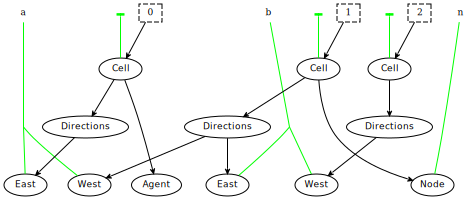

openDoor

,→,


closedDoor

,→,


goWest

,→,


goEast

,→,


goNorth

,→,


goSouth

,→,


goIn

,→,


goOut

,→,


In [38]:

# Layers of abstraction

float p = 0.5; # probability of an open door

ctrl Cell = 1;
ctrl Node = 1;
ctrl Directions = 0;
atomic ctrl Agent = 0;

atomic ctrl North = 1;
atomic ctrl East = 1;
atomic ctrl West = 1;
atomic ctrl South = 1;

big initial = /n1 /n2 /n3 (
           # starting position
           Cell{n1}.(Directions.East{a}| Agent)
           # corridor with door
           || Cell{n2}.(Directions.(East{b} | West{a}) | Node{n}.1)
           # corridor after door
           || Cell{n3}.Directions.West{b});

action room
  react openDoor = Cell{w}.(Agent | Node{n}.1 | id)
                   -[p]-> /x /y /z /a /b /c /d
                   Cell{w}.(Agent | Node{n}.(Cell{n}.Directions.(East{a} | South{b}) # top left
                                           | Cell{x}.Directions.(West{a} | South{c}) # top right
                                           | Cell{y}.Directions.(North{b} | East{d}) # bottom left
                                           | Cell{z}.Directions.(North{c} | West{d})) | id); # bottom right
  react closedDoor = Cell{w}.(Agent | Node{n}.1 | id)
                     -[1.0-p]-> /x /y /z /b /c /d
                     Cell{w}.(Agent | Node{n}.(Cell{n}.Directions.(South{b}) # top left
                                             | Cell{x}.Directions.(South{c}) # top right
                                             | Cell{y}.Directions.(North{b} | East{d}) # bottom left
                                             | Cell{z}.Directions.(North{c} | West{d})) | id); # bottom right
end

action west
    react goWest = Cell{n1}.(Directions.(East{b} | id) | id)
                || Cell{n2}.(Directions.(West{b} | id) | Agent | id)
                -[1.0]->
                   Cell{n1}.(Directions.(East{b} | id) | Agent | id)
                || Cell{n2}.(Directions.(West{b} | id) | id);
end

action east
    react goEast = Cell{n1}.(Directions.(East{b} | id) | Agent | id)
                         || Cell{n2}.(Directions.(West{b} | id) | id)
                         -[1.0]->
                            Cell{n1}.(Directions.(East{b} | id) | id)
                         || Cell{n2}.(Directions.(West{b} | id) | Agent | id);
end

action north
  react goNorth =
       Cell{n1}.(Directions.(North{b} | id) | Agent | id)
    || Cell{n2}.(Directions.(South{b} | id) | id)
    -[1.0]->
       Cell{n1}.(Directions.(North{b} | id) | id)
    || Cell{n2}.(Directions.(South{b} | id) | Agent | id);
end

action south
    react goSouth = Cell{n1}.(Directions.(South{b} | id) | Agent | id)
                          || Cell{n2}.(Directions.(North{b} | id) | id)
                          -[1.0]->
                             Cell{n1}.(Directions.(South{b} | id) | id)
                          || Cell{n2}.(Directions.(North{b} | id) | Agent | id);
end

action goIn
  react goIn = Cell{x}.(Agent | Node{n}.(Cell{n} | id) | id)
               -[1.0]->
               Cell{x}.(Node{n}.(Cell{n}.(Agent | id) | id) | id);
end

action goOut
  react goOut = Cell{x}.(Node{n}.(Cell{n}.(Agent | id) | id) | id)
              -[1.0]->
              Cell{x}.(Agent | Node{n}.(Cell{n} | id) | id);
end

begin nbrs
  init initial;
  rules = [ {openDoor, closedDoor}, {goNorth, goEast, goWest, goSouth, goIn, goOut} ];
end